# Build a classification model

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
#read data

train_data = pd.read_csv('/Users/nishanthi/Python/StateFarm/exercise_01_train.csv')
test_data = pd.read_csv('/Users/nishanthi/Python/StateFarm/exercise_01_test.csv')

# Dropping the duplicate records

In [3]:
#drop duplicates

train_data = train_data.drop_duplicates()
train_data.head()

x0         x1         x2         x3         x4         x5        x6  \
0  10.142889 -15.675620   3.583176 -22.397489  27.221894 -34.110924 -0.072829   
1 -52.214630   5.847135 -10.902843 -14.132351  20.588574  36.107322  0.115023   
2  67.718500   2.064334  12.394186 -18.667102  47.465504 -50.373658  0.253707   
3 -28.003111   8.565128  -8.592092   5.918960  -3.224154  78.315783 -0.879845   
4  80.703016  30.736353 -30.101857 -21.201140 -91.946233 -47.469246 -0.646831   

         x7        x8        x9 ...       x91        x92     x93       x94  \
0 -0.544444  0.997601 -2.691778 ...  1.916575   5.240820  euorpe  2.431170   
1  0.276093 -0.699168 -0.972708 ...  0.370941  -3.794542    asia  2.592326   
2  1.068968  2.939713  2.691218 ...  1.449817  12.470532    asia  7.143821   
3  1.176889 -2.414752  0.589646 ... -3.274733   3.484450    asia -4.998195   
4 -0.578398  0.980849 -1.426112 ... -0.644261   4.082783    asia -0.012556   

         x95        x96        x97       x98        x99  y  
0   0.454074 -18.572032 -14.291524  0.178579  18.110170  0  
1  31.921833   3.317139  10.037003 -1.930870  -3.486898  0  
2   9.401490 -10.604968   7.643215 -0.842198 -79.358236  0  
3 -20.312810  14.818524  -9.180674  1.356972  14.475681  0  
4 -29.334324   1.734433 -12.262072 -0.043228 -19.003881  0  

[5 rows x 101 columns]

In [4]:
#extracting data and target

y = train_data['y']
train = train_data.drop('y', axis = 1)
print(y.head(), train.head())

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64           x0         x1         x2         x3         x4         x5        x6  \
0  10.142889 -15.675620   3.583176 -22.397489  27.221894 -34.110924 -0.072829   
1 -52.214630   5.847135 -10.902843 -14.132351  20.588574  36.107322  0.115023   
2  67.718500   2.064334  12.394186 -18.667102  47.465504 -50.373658  0.253707   
3 -28.003111   8.565128  -8.592092   5.918960  -3.224154  78.315783 -0.879845   
4  80.703016  30.736353 -30.101857 -21.201140 -91.946233 -47.469246 -0.646831   

         x7        x8        x9    ...             x90       x91        x92  \
0 -0.544444  0.997601 -2.691778    ...     -151.134483  1.916575   5.240820   
1  0.276093 -0.699168 -0.972708    ...      -58.955871  0.370941  -3.794542   
2  1.068968  2.939713  2.691218    ...      -74.014931  1.449817  12.470532   
3  1.176889 -2.414752  0.589646    ...      165.859181 -3.274733   3.484450   
4 -0.578398  0.980849 -1.426112    ...     -174.486251 -0.644

## Splitting of data to train and validation sets
### Stratified sampling is used, along with a split of 75-25

In [5]:
#spliting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y,
                                                    stratify=y, 
                                                    test_size=0.25)

print(X_train.head(), y_train.head(), X_test.head(), y_test.head())

              x0         x1         x2         x3         x4         x5  \
4076  -49.431779  -7.455440 -15.416290   5.704860   7.945496 -21.451029   
33865   7.344208 -25.112342  18.358592 -12.786874 -19.256511  16.509559   
27125  42.260515  -0.249627  11.376662 -33.571025  57.988767 -57.609281   
11531 -34.359628  26.987230 -19.460811  19.548243  80.131310  79.645556   
27812 -11.149426  -6.000796   8.801969  12.887644 -16.828651  93.753267   

             x6        x7        x8        x9    ...             x90  \
4076  -0.824267 -0.837227  0.009216 -2.381365    ...      -13.616153   
33865  0.330648  0.128377 -2.125784  1.623137    ...      191.494106   
27125  1.804540  1.693927  0.181142  0.314456    ...     -134.305562   
11531 -1.076060  4.231044 -3.599019 -3.434800    ...       70.371694   
27812  0.238948  0.121508 -3.323421 -0.466854    ...     -350.584443   

            x91        x92   x93        x94        x95        x96        x97  \
4076  -2.694992  20.571761  asia  -2

# Cleaning categorical data

In [6]:
#categorical variables

cat = X_train.select_dtypes(include=[object])

print(cat.head())

              x34      x35        x41     x45  x68   x93
4076   volkswagon  thurday  $-1010.67   -0.0%  Jun  asia
33865      Toyota      wed   $-767.76   -0.0%  Jun  asia
27125  volkswagon      wed   $1149.96   0.01%  Jun  asia
11531       Honda      wed  $-1322.69  -0.01%  Jun  asia
27812      Toyota      wed    $570.97   0.01%  Jun  asia


## x41 and x45 are found to have special characters that makes thier dtype object

In [7]:
#x41 and x45 to numeric

X_train['x41'] = X_train.x41.astype(str).apply(lambda x: x.replace('$', ''))
X_train['x45'] = X_train.x45.astype(str).apply(lambda x: x.replace('%', ''))

X_train['x41'] = pd.to_numeric(X_train['x41'], errors = 'coerce')
X_train['x45'] = pd.to_numeric(X_train['x45'], errors = 'coerce')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [8]:
#selecting the columns with dtype object
cat = X_train.select_dtypes(include=[object])
print(cat.head())

#drop from X_train
X_train = X_train.drop(list(cat.columns), axis =1)
print(X_train.head())

              x34      x35  x68   x93
4076   volkswagon  thurday  Jun  asia
33865      Toyota      wed  Jun  asia
27125  volkswagon      wed  Jun  asia
11531       Honda      wed  Jun  asia
27812      Toyota      wed  Jun  asia
              x0         x1         x2         x3         x4         x5  \
4076  -49.431779  -7.455440 -15.416290   5.704860   7.945496 -21.451029   
33865   7.344208 -25.112342  18.358592 -12.786874 -19.256511  16.509559   
27125  42.260515  -0.249627  11.376662 -33.571025  57.988767 -57.609281   
11531 -34.359628  26.987230 -19.460811  19.548243  80.131310  79.645556   
27812 -11.149426  -6.000796   8.801969  12.887644 -16.828651  93.753267   

             x6        x7        x8        x9    ...            x89  \
4076  -0.824267 -0.837227  0.009216 -2.381365    ...      -2.356481   
33865  0.330648  0.128377 -2.125784  1.623137    ...       6.278722   
27125  1.804540  1.693927  0.181142  0.314456    ...      19.078738   
11531 -1.076060  4.231044 -3.599019 -

## Imputing categorical variables

In [9]:
#number of missing values

cat.isna().sum()

x34    4
x35    5
x68    7
x93    4
dtype: int64

In [10]:
#print the unique values in categorical variables

[cat[i].value_counts() for i in list(cat.columns)]

[volkswagon    9455
 Toyota        8214
 bmw           5457
 Honda         3841
 tesla         1697
 chrystler      923
 nissan         259
 ford           118
 mercades        24
 chevrolet        8
 Name: x34, dtype: int64, wed          11185
 thurday       9964
 wednesday     4470
 thur          3248
 tuesday        684
 friday         383
 monday          47
 fri             14
 Name: x35, dtype: int64, July       8343
 Jun        6981
 Aug        6091
 May        3588
 sept.      2600
 Apr        1226
 Oct         701
 Mar         285
 Nov         121
 Feb          35
 Dev          14
 January       8
 Name: x68, dtype: int64, asia       26516
 america     2383
 euorpe      1097
 Name: x93, dtype: int64]

### The category values are found to have spelling mistakes

In [11]:
#function to correct spellings

import operator

def matchChecker(word, compared):
    if compared == 'month':
        list_of_words = ['January', 'February', 'March', 'April', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    elif compared == 'day':
        list_of_words = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    word_lst = [w for w in word]
    lst = [[w for w in elem.lower()] for elem in list_of_words]

    dict_count = {}
    for elem in lst:
        count = 0
        for i in range(min(len(word_lst), len(elem))):
            if word_lst[i]==elem[i]:
                count+=1
        dict_count[''.join(elem)] = count

    result = sorted(dict_count.items(), key=operator.itemgetter(1), reverse=True)

    return result[0][0]


In [12]:
#correcting week day names and month names

import re
import string
regex = re.compile(r"[%s]" % string.punctuation)

In [13]:
cat['x68']=[regex.sub('',str(val)) for val in cat['x68']]
cat['x68']=[matchChecker(val, 'month') for val in cat['x68']]
print(cat['x68'].head())

cat['x35']=[regex.sub('',str(val)) for val in cat['x35']]
cat['x35']=[matchChecker(val, 'day') for val in cat['x35']]
print(cat['x35'].head())

4076     june
33865    june
27125    june
11531    june
27812    june
Name: x68, dtype: object
4076       tuesday
33865    wednesday
27125    wednesday
11531    wednesday
27812    wednesday
Name: x35, dtype: object


In [14]:
#print the unique values in categorical variables

[cat[i].value_counts() for i in list(cat.columns)]

[volkswagon    9455
 Toyota        8214
 bmw           5457
 Honda         3841
 tesla         1697
 chrystler      923
 nissan         259
 ford           118
 mercades        24
 chevrolet        8
 Name: x34, dtype: int64, wednesday    15655
 tuesday      10648
 thursday      3248
 friday         397
 monday          52
 Name: x35, dtype: int64, july         8343
 june         6981
 august       6091
 january      3603
 september    2600
 april        1226
 october       701
 march         285
 november      121
 february       49
 Name: x68, dtype: int64, asia       26516
 america     2383
 euorpe      1097
 Name: x93, dtype: int64]

### If there are any other values other than those listed, they are changed to 'others'

In [15]:
#'others' if there's any other value other than what we handled

dict_cat = {i: cat[i].unique() for i in list(cat.columns)}

for col in list(cat.columns):
    for x in cat[col]:
        if x not in list(dict_cat[col]):
            cat[col].loc[x] = 'others'            

In [16]:
#imputing categorical values with median

from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer(strategy='most_frequent')

cat['x34']=imputer.fit_transform(cat['x34'])
cat['x35']=imputer.fit_transform(cat['x35'])
cat['x68']=imputer.fit_transform(cat['x68'])
cat['x93']=imputer.fit_transform(cat['x93'])

cat.isna().sum()

x34    0
x35    0
x68    0
x93    0
dtype: int64

### Label encoding and then OneHotEncoding categorical variables

In [17]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat['x34']=le.fit_transform(cat['x34'])
cat['x35']=le.fit_transform(cat['x35'])
cat['x68']=le.fit_transform(cat['x68'])
cat['x93']=le.fit_transform(cat['x93'])

[cat[i].value_counts() for i in list(cat.columns)]

[9    9459
 1    8214
 2    5457
 0    3841
 8    1697
 4     923
 7     259
 5     118
 6      24
 3       8
 Name: x34, dtype: int64, 4    15655
 3    10648
 2     3248
 0      397
 1       52
 Name: x35, dtype: int64, 4    8343
 5    6981
 1    6091
 3    3603
 9    2600
 0    1226
 8     701
 6     285
 7     121
 2      49
 Name: x68, dtype: int64, 1    26520
 0     2383
 2     1097
 Name: x93, dtype: int64]

In [18]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, dtype=int)
dfcat = pd.DataFrame(ohe.fit_transform(cat[cat.columns]), columns=ohe.get_feature_names())
dfcat.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


x0_0.0  x0_1.0  x0_2.0  x0_3.0  x0_4.0  x0_5.0  x0_6.0  x0_7.0  x0_8.0  \
0       0       0       0       0       0       0       0       0       0   
1       0       1       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       1       0       0       0       0       0       0       0       0   
4       0       1       0       0       0       0       0       0       0   

   x0_9.0   ...    x2_3.0  x2_4.0  x2_5.0  x2_6.0  x2_7.0  x2_8.0  x2_9.0  \
0       1   ...         0       0       1       0       0       0       0   
1       0   ...         0       0       1       0       0       0       0   
2       1   ...         0       0       1       0       0       0       0   
3       0   ...         0       0       1       0       0       0       0   
4       0   ...         0       0       1       0       0       0       0   

   x3_0.0  x3_1.0  x3_2.0  
0       0       1       0  
1       0       1       0  
2       0       1       0  
3       0       1       0  
4       0       1       0  

[5 rows x 28 columns]

## Cleaning the numeric data
### Assessing the percentage of NaN

In [19]:
#get percentage of missing data
train_missing=(X_train.isnull().sum() / len(X_train)) * 100

#check if there are columns without missing data
print("Column(s) with no value missing:", len(train_missing[train_missing==0]))

missing_data = pd.DataFrame({'Missing Percentage' : train_missing})
missing_data

Column(s) with no value missing: 0


Missing Percentage
x0             0.033333
x1             0.020000
x2             0.020000
x3             0.030000
x4             0.016667
x5             0.023333
x6             0.020000
x7             0.030000
x8             0.016667
x9             0.010000
x10            0.010000
x11            0.020000
x12            0.033333
x13            0.033333
x14            0.006667
x15            0.016667
x16            0.020000
x17            0.030000
x18            0.026667
x19            0.026667
x20            0.006667
x21            0.033333
x22            0.013333
x23            0.023333
x24            0.030000
x25            0.013333
x26            0.026667
x27            0.026667
x28            0.030000
x29            0.016667
..                  ...
x69            0.043333
x70            0.013333
x71            0.010000
x72            0.023333
x73            0.010000
x74            0.016667
x75            0.023333
x76            0.016667
x77            0.023333
x78            0.016667
x79            0.026667
x80            0.023333
x81            0.010000
x82            0.016667
x83            0.013333
x84            0.006667
x85            0.030000
x86            0.023333
x87            0.020000
x88            0.010000
x89            0.023333
x90            0.020000
x91            0.006667
x92            0.013333
x94            0.030000
x95            0.016667
x96            0.043333
x97            0.016667
x98            0.016667
x99            0.023333

[96 rows x 1 columns]

### Imputing numeric variables using Simple Imputer

In [20]:
#imputing numeric variables

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None) 
X_train = pd.DataFrame(imp.fit_transform(X_train[X_train.columns]))

X_train.head()

0          1          2          3          4          5         6   \
0 -49.431779  -7.455440 -15.416290   5.704860   7.945496 -21.451029 -0.824267   
1   7.344208 -25.112342  18.358592 -12.786874 -19.256511  16.509559  0.330648   
2  42.260515  -0.249627  11.376662 -33.571025  57.988767 -57.609281  1.804540   
3 -34.359628  26.987230 -19.460811  19.548243  80.131310  79.645556 -1.076060   
4 -11.149426  -6.000796   8.801969  12.887644 -16.828651  93.753267  0.238948   

         7         8         9     ...             86          87        88  \
0 -0.837227  0.009216 -2.381365    ...      -2.356481  -13.616153 -2.694992   
1  0.128377 -2.125784  1.623137    ...       6.278722  191.494106  3.124837   
2  1.693927  0.181142  0.314456    ...      19.078738 -134.305562 -0.045444   
3  4.231044 -3.599019 -3.434800    ...       9.732189   70.371694 -1.755953   
4  0.121508 -3.323421 -0.466854    ...     -12.168858 -350.584443  1.311636   

          89         90         91         92         93        94         95  
0  20.571761  -2.849911   2.988963  -2.089495   2.482933 -7.745104  43.461776  
1   4.903437  -4.747034 -10.688688 -19.814234 -19.324366 -2.969147 -21.365441  
2  12.607054   0.473031 -25.086563 -29.125084   4.173817 -2.022227  -9.277150  
3   1.897962 -13.340683   0.850978   5.783372 -12.172708  3.308329 -70.890375  
4  -9.940223  -2.576110 -25.137247 -13.554969   0.069614 -8.795250  41.753175  

[5 rows x 96 columns]

### Scaling the numeric values using Standard Scalar

In [21]:
#Scaling the numeric values using Standard Scalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))
X_train.head()

0         1         2         3         4         5         6   \
0 -1.498235 -0.277590 -0.668286  0.427639  0.184007 -0.462641 -0.774111   
1 -0.021677 -1.440448  0.699780 -0.790659 -0.458725  0.440180  0.308747   
2  0.886381  0.196974  0.416974 -2.159988  1.366435 -1.322597  1.690680   
3 -1.106258  1.990753 -0.832111  1.339687  1.889622  1.941751 -1.010193   
4 -0.502636 -0.181790  0.312685  0.900865 -0.401359  2.277276  0.222768   

         7         8         9     ...           86        87        88  \
0 -0.244660  0.228263 -1.240151    ...    -0.320331  0.005494 -0.814809   
1  0.040387 -0.495780  0.858866    ...     0.807828  1.340985  0.947205   
2  0.502537  0.286568  0.172902    ...     2.480104 -0.780326 -0.012631   
3  1.251495 -0.995399 -1.792323    ...     1.259011  0.552346 -0.530505   
4  0.038359 -0.901935 -0.236632    ...    -1.602283 -2.188537  0.398240   

         89        90        91        92        93        94        95  
0  2.348880 -0.561555  0.155738 -0.084238  0.313489 -1.383127  1.141751  
1  0.562262 -0.942640 -0.555618 -1.129872 -1.202828 -0.533058 -0.617198  
2  1.440685  0.105941 -1.304431 -1.679147  0.431060 -0.364517 -0.289208  
3  0.219555 -2.668889  0.044544  0.380205 -0.705555  0.584265 -1.960952  
4 -1.130322 -0.506555 -1.307067 -0.760620  0.145685 -1.570042  1.095392  

[5 rows x 96 columns]

In [22]:
#adding in the onehotencoded categorical variables

X_train = pd.concat([X_train, dfcat], axis =1)
X_train.head()

0         1         2         3         4         5         6  \
0 -1.498235 -0.277590 -0.668286  0.427639  0.184007 -0.462641 -0.774111   
1 -0.021677 -1.440448  0.699780 -0.790659 -0.458725  0.440180  0.308747   
2  0.886381  0.196974  0.416974 -2.159988  1.366435 -1.322597  1.690680   
3 -1.106258  1.990753 -0.832111  1.339687  1.889622  1.941751 -1.010193   
4 -0.502636 -0.181790  0.312685  0.900865 -0.401359  2.277276  0.222768   

          7         8         9   ...    x2_3.0  x2_4.0  x2_5.0  x2_6.0  \
0 -0.244660  0.228263 -1.240151   ...         0       0       1       0   
1  0.040387 -0.495780  0.858866   ...         0       0       1       0   
2  0.502537  0.286568  0.172902   ...         0       0       1       0   
3  1.251495 -0.995399 -1.792323   ...         0       0       1       0   
4  0.038359 -0.901935 -0.236632   ...         0       0       1       0   

   x2_7.0  x2_8.0  x2_9.0  x3_0.0  x3_1.0  x3_2.0  
0       0       0       0       0       1       0  
1       0       0       0       0       1       0  
2       0       0       0       0       1       0  
3       0       0       0       0       1       0  
4       0       0       0       0       1       0  

[5 rows x 124 columns]

# Exploratory Data Analysis

### Visualizing the correlation using seaborn heatmap

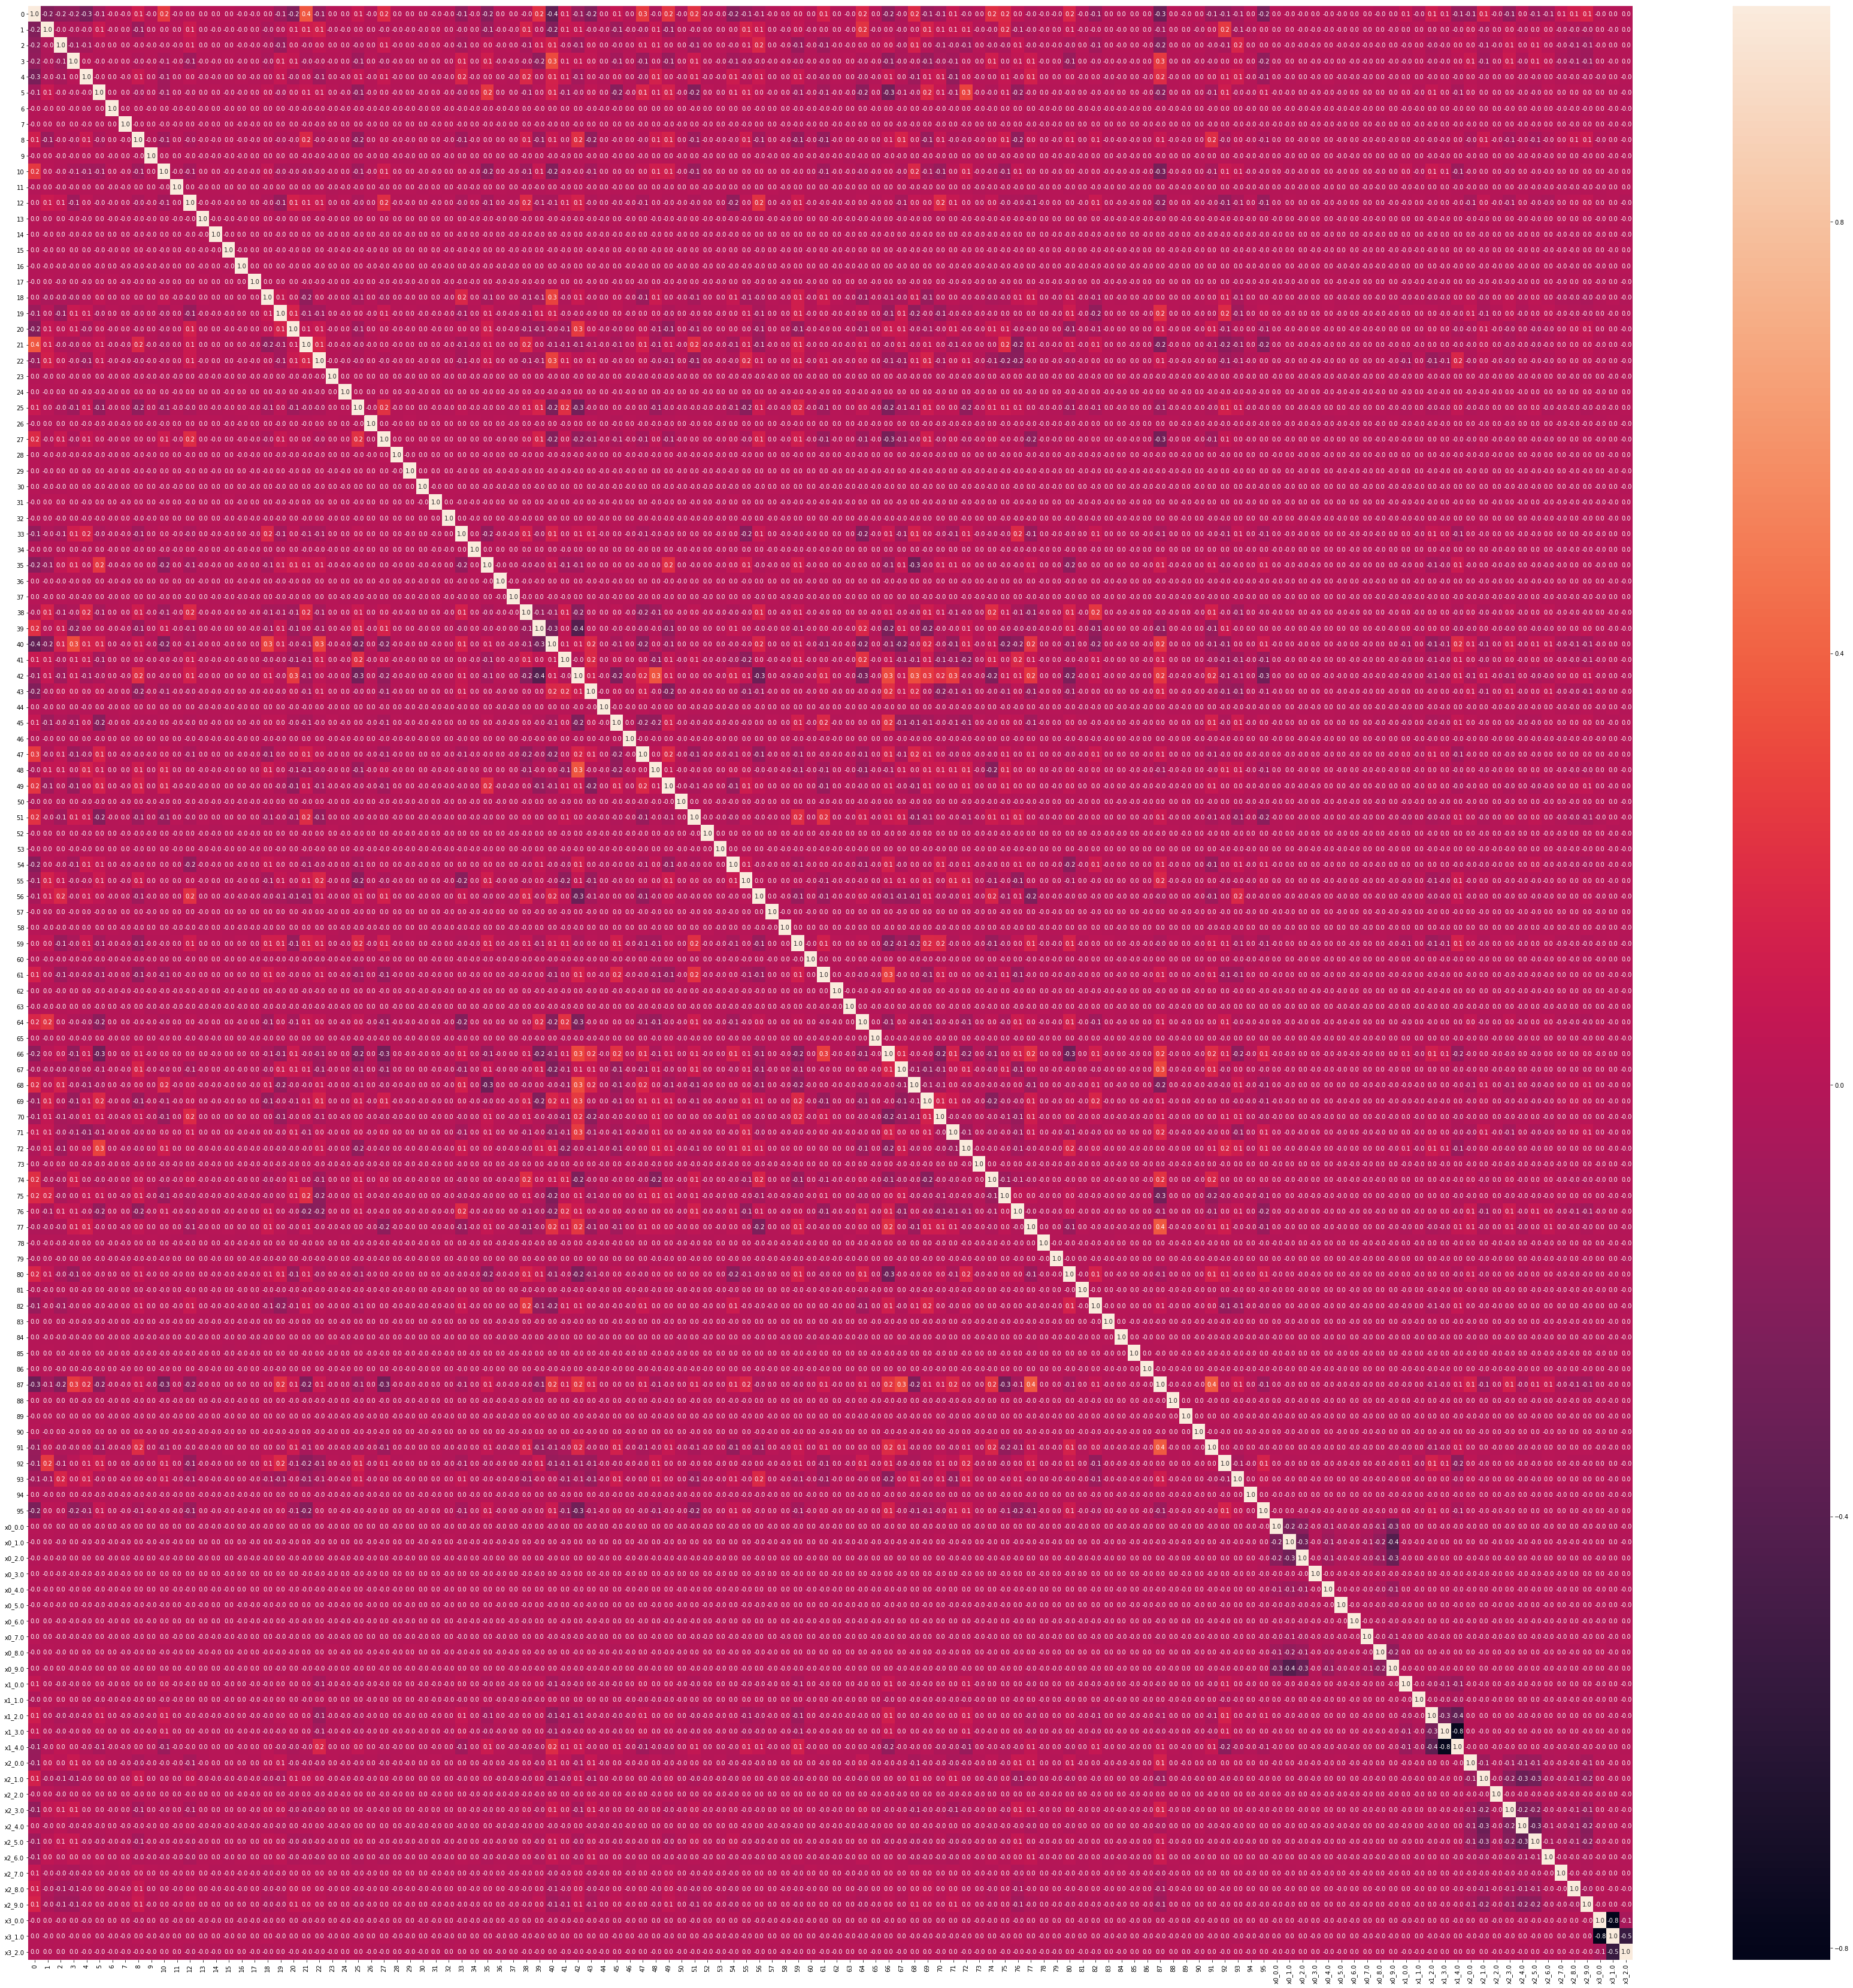

In [24]:
#heatmap to find correlation among features
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(60,60))
sns.heatmap(corrmat, annot=True, fmt='.1f')
plt.show()

In [25]:
corrmat = corrmat.replace(1.0,0.0)
corrmat

0         1         2         3         4         5         6  \
0       0.000000 -0.216968 -0.160742 -0.151274 -0.258156 -0.075554 -0.002839   
1      -0.216968  0.000000 -0.020184 -0.032147 -0.021188  0.085296 -0.000139   
2      -0.160742 -0.020184  0.000000 -0.091894 -0.065702 -0.001182  0.005909   
3      -0.151274 -0.032147 -0.091894  0.000000  0.009871 -0.005167 -0.003100   
4      -0.258156 -0.021188 -0.065702  0.009871  0.000000 -0.002812  0.001354   
5      -0.075554  0.085296 -0.001182 -0.005167 -0.002812  0.000000  0.001759   
6      -0.002839 -0.000139  0.005909 -0.003100  0.001354  0.001759  0.000000   
7      -0.000979  0.006304  0.001582  0.002993 -0.000238  0.000145  0.001575   
8       0.110826 -0.115048 -0.000181 -0.024994  0.079546 -0.043960  0.006183   
9      -0.004215  0.009649 -0.000385 -0.002333  0.003256  0.003582 -0.002849   
10      0.247699  0.015248 -0.007248 -0.052272 -0.085981 -0.088112  0.003852   
11     -0.008748  0.008167 -0.000463 -0.001811  0.001915  0.000769 -0.008099   
12      0.012983  0.093399  0.060941 -0.099504  0.029592 -0.014952 -0.006502   
13      0.008137  0.002032  0.008032 -0.003402 -0.007268  0.000637 -0.000936   
14      0.003219 -0.002499  0.002120 -0.001133 -0.005074  0.002770  0.000582   
15      0.002756 -0.003032  0.001293  0.006349  0.000673 -0.006586 -0.003085   
16     -0.005078 -0.001924 -0.000551 -0.010197  0.009445 -0.009192  0.000853   
17     -0.005228  0.003868 -0.004826  0.000063 -0.006981  0.003363  0.012289   
18      0.000837 -0.043270 -0.028954 -0.041787  0.000394  0.042531  0.000728   
19     -0.107816  0.008190 -0.124373  0.076727  0.062601 -0.026936  0.006183   
20     -0.215192  0.062392  0.036680  0.053359 -0.047477  0.030951 -0.006670   
21      0.358599  0.103530 -0.027198 -0.043622  0.026129  0.065092 -0.013131   
22     -0.111403  0.126741  0.039882 -0.012960 -0.094589  0.053035 -0.004561   
23      0.001436 -0.009670  0.003295 -0.002345  0.001179  0.003611 -0.002570   
24      0.009043 -0.003978  0.001690  0.002285 -0.002929 -0.008381 -0.005069   
25      0.074209  0.009821 -0.037296 -0.101806  0.061346 -0.146773 -0.005784   
26     -0.011326  0.001872  0.000206  0.004039 -0.001560 -0.002119 -0.003958   
27      0.182251 -0.006571  0.079779 -0.039780  0.067916  0.021468 -0.006686   
28      0.007273 -0.007332 -0.000222 -0.003656 -0.000594 -0.005247 -0.005612   
29      0.003065 -0.004728  0.002790  0.000158  0.002118  0.001861 -0.003552   
...          ...       ...       ...       ...       ...       ...       ...   
94      0.002791 -0.005592  0.002239  0.013755 -0.001884 -0.002364 -0.005161   
95     -0.248802  0.026425  0.021781 -0.153423 -0.101694  0.066184  0.006630   
x0_0.0  0.007452  0.005172  0.001010  0.001297  0.002643 -0.001465  0.008226   
x0_1.0 -0.001597  0.002718 -0.005161  0.004033 -0.011474 -0.003935 -0.002836   
x0_2.0 -0.004761 -0.000230 -0.005457  0.003085  0.007247  0.000267 -0.008864   
x0_3.0  0.006081 -0.002984 -0.006506 -0.000073 -0.002797 -0.004474 -0.001378   
x0_4.0 -0.002093 -0.007544  0.008279 -0.006315  0.010270 -0.003284 -0.004111   
x0_5.0 -0.000078 -0.002433 -0.002533  0.002638 -0.003901 -0.013507 -0.003774   
x0_6.0  0.004100  0.001203 -0.003244 -0.005911 -0.005176  0.009101 -0.002881   
x0_7.0  0.014938  0.001887 -0.003538 -0.010526 -0.007620  0.009594 -0.004334   
x0_8.0 -0.007545  0.002841 -0.000295  0.001096  0.005615  0.005715  0.006518   
x0_9.0  0.001229 -0.004762  0.007299 -0.003461 -0.001059  0.002501  0.004048   
x1_0.0  0.054271  0.000436 -0.012595 -0.012935  0.006044  0.030185 -0.007166   
x1_1.0 -0.030863  0.015175  0.017728  0.012397  0.002629 -0.010920 -0.000517   
x1_2.0  0.107496  0.001633 -0.043594 -0.029576 -0.002303  0.053146  0.004935   
x1_3.0  0.054401  0.005062 -0.015149 -0.007072  0.012888  0.022640  0.001355   
x1_4.0 -0.128822 -0.007228  0.043033  0.027098 -0.012515 -0.060741 -0.002685   
x2_0.0 -0.118545  0.049304  0.023947  0.078139  0.019155  0.025767  0.002234   
x2_1.0  0.12625

### Selecting the correlations pairs that seems concerning

In [26]:
lst = []
for i in list(corrmat.columns):
    for j in list(corrmat.columns):
        if corrmat.loc[i][j] >=0.3 or corrmat.loc[i][j]<=-0.3:
            if i not in lst:
                lst.append(i)
            if j not in lst:
                lst.append(j)
lst

[0,
 21,
 40,
 87,
 3,
 35,
 68,
 39,
 42,
 48,
 56,
 66,
 80,
 67,
 77,
 91,
 'x0_1.0',
 'x0_9.0',
 'x0_2.0',
 'x1_2.0',
 'x1_4.0',
 'x1_3.0',
 'x2_1.0',
 'x2_4.0',
 'x2_5.0',
 'x3_0.0',
 'x3_1.0',
 'x3_2.0']

### Further analysing the concerned pairs with histogram and scatterplot

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


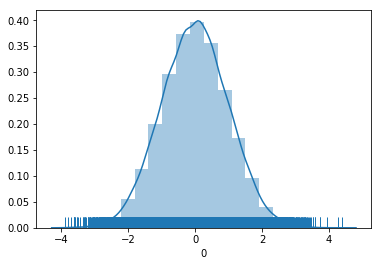

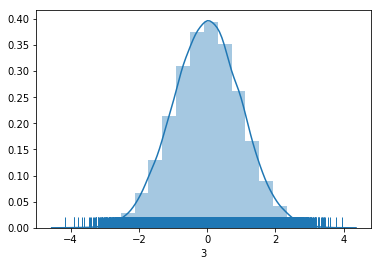

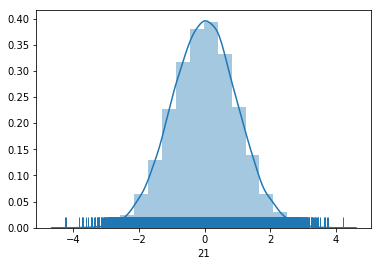

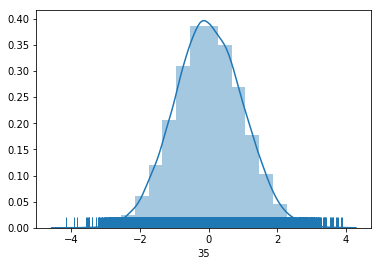

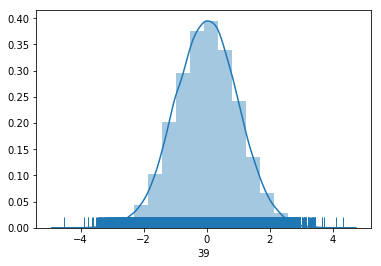

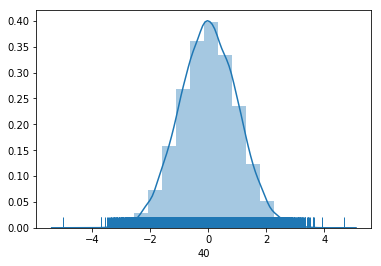

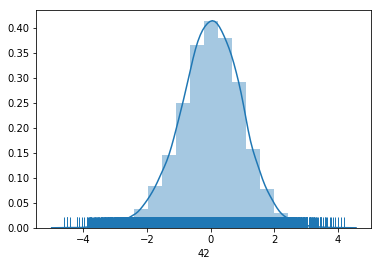

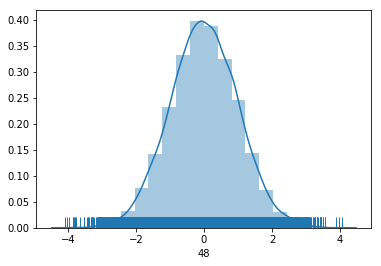

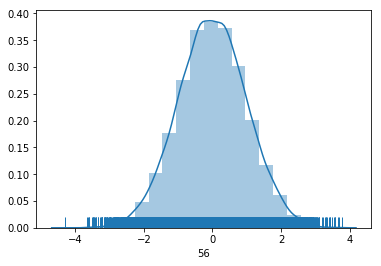

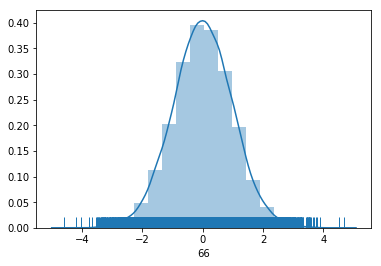

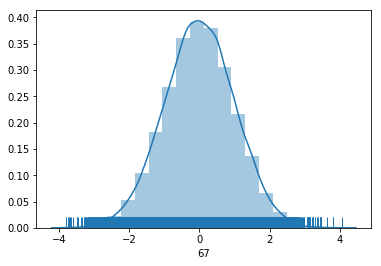

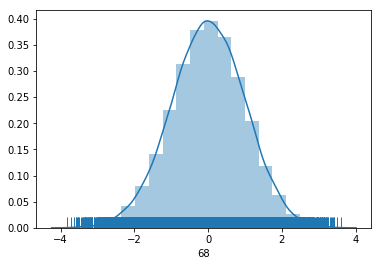

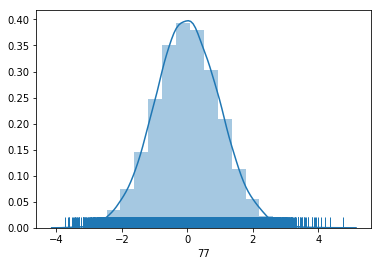

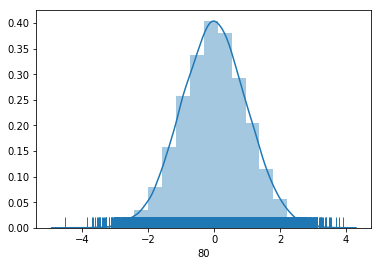

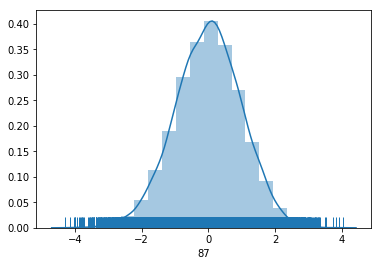

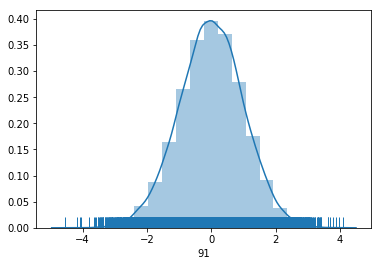

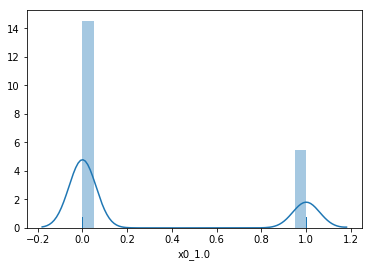

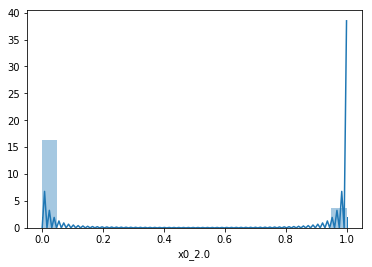

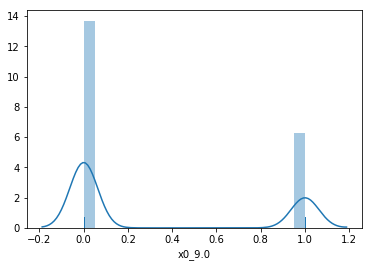

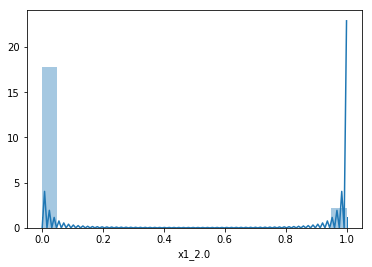

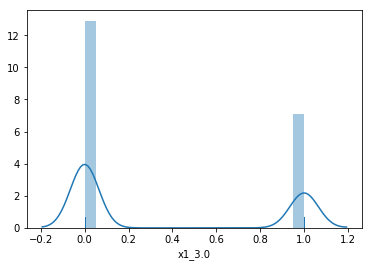

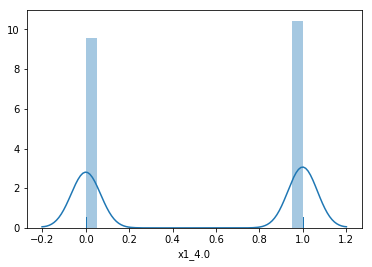

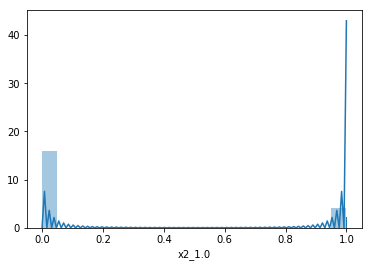

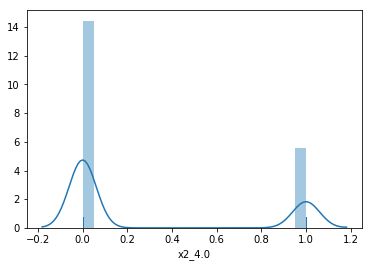

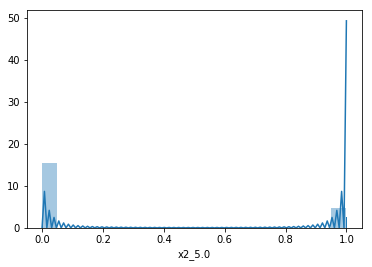

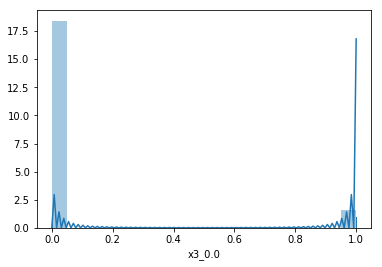

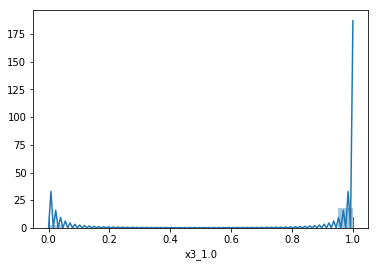

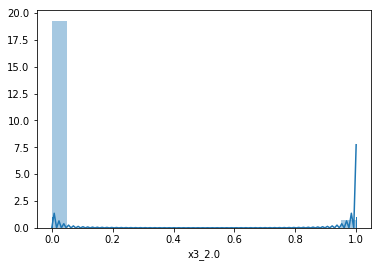

In [27]:
corr_mat = X_train.loc[:, X_train.columns.isin(lst)]

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn= ignore_warn

for col in corr_mat.columns:
    sns.distplot(corr_mat[col], hist=True, kde=True, rug=True, bins=20);
    plt.show()

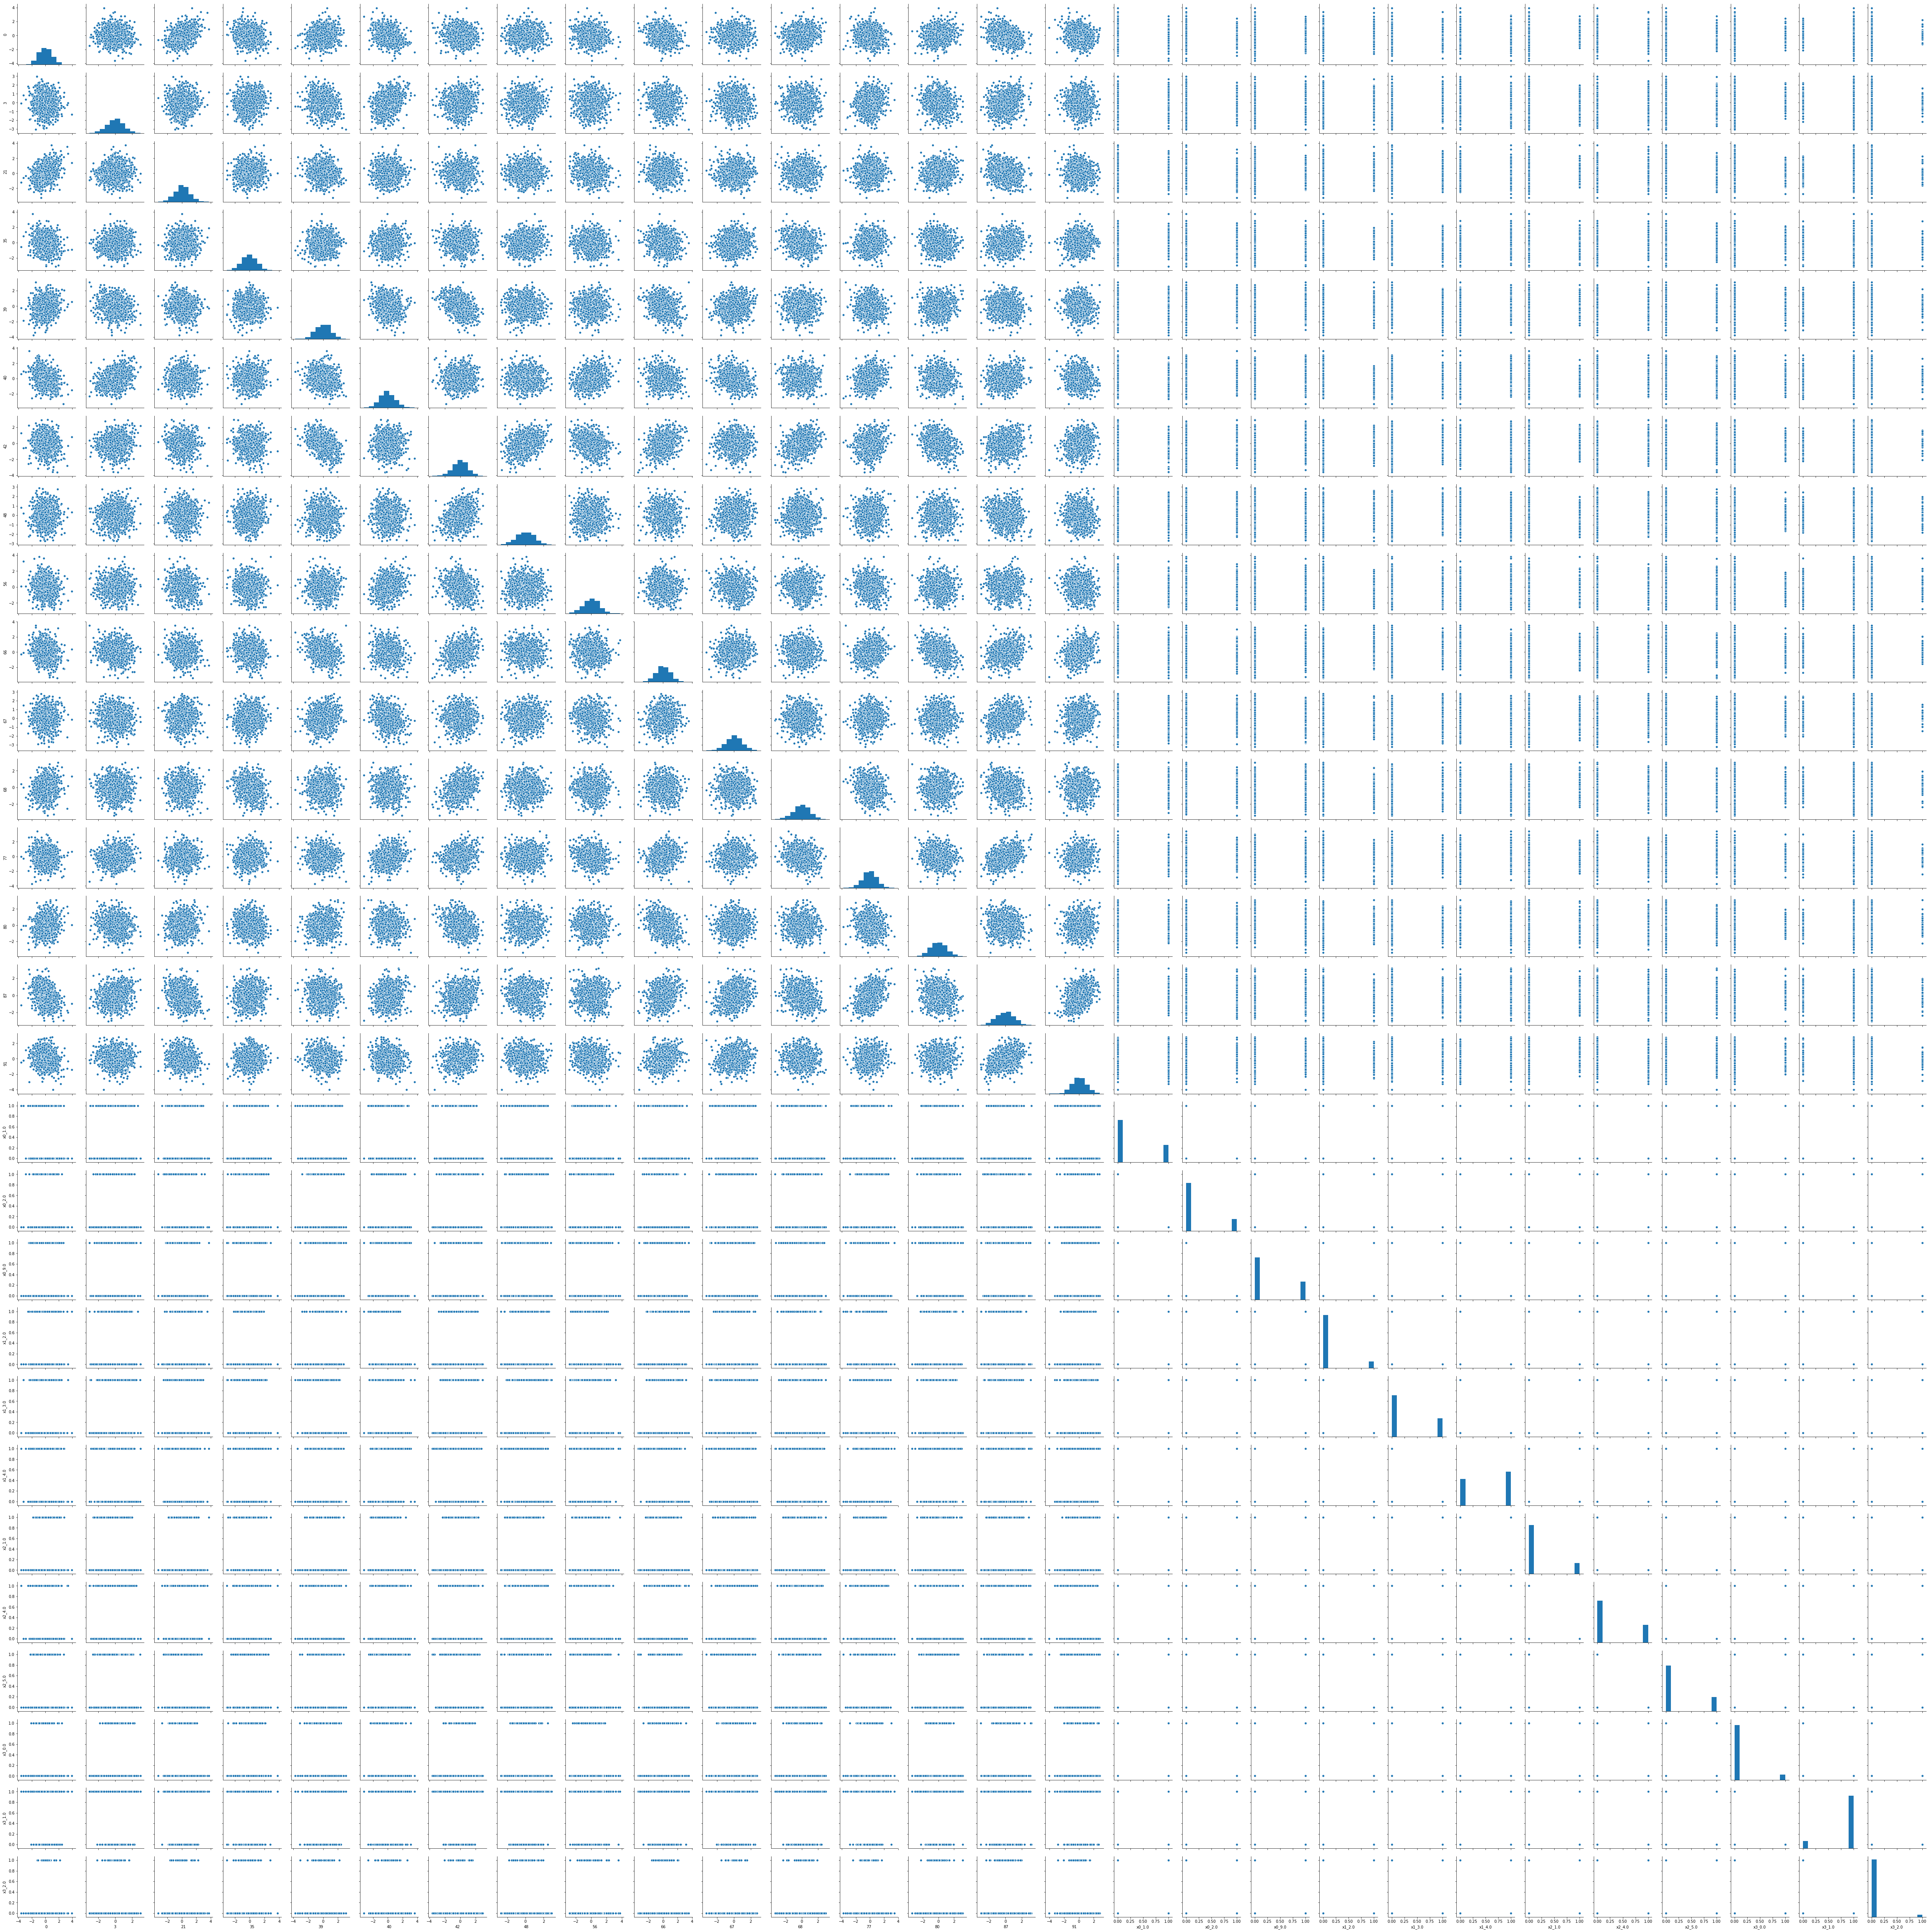

In [28]:
corr_mat = X_train.loc[:, X_train.columns.isin(lst)]

sns.pairplot(corr_mat.sample(1000), kind='scatter', diag_kind='hist')
plt.show()

## Applying pre-preocessing to validation data set
### Better option would be to dump the process and re-use it

In [29]:
#pre-processing on validation data set

#categorical variables
cat_Xtest = X_test.select_dtypes(include=[object])

#x41 and x45 to numeric
X_test['x41'] = X_test.x41.astype(str).apply(lambda x: x.replace('$', ''))
X_test['x45'] = X_test.x45.astype(str).apply(lambda x: x.replace('%', ''))

X_test['x41'] = pd.to_numeric(X_test['x41'], errors = 'coerce')
X_test['x45'] = pd.to_numeric(X_test['x45'], errors = 'coerce')

#selecting the columns with dtype object
cat_Xtest = X_test.select_dtypes(include=[object])

#drop from X_test
X_test = X_test.drop(list(cat_Xtest.columns), axis =1)

#correcting spelling of days and months
import re
import string
regex = re.compile(r"[%s]" % string.punctuation)

cat_Xtest['x68']=[regex.sub('',str(val)) for val in cat_Xtest['x68']]
cat_Xtest['x68']=[matchChecker(val, 'month') for val in cat_Xtest['x68']]

cat_Xtest['x35']=[regex.sub('',str(val)) for val in cat_Xtest['x35']]
cat_Xtest['x35']=[matchChecker(val, 'day') for val in cat_Xtest['x35']]

#others
dict_cat_Xtest = {i: cat_Xtest[i].unique() for i in list(cat_Xtest.columns)}

for col in list(cat_Xtest.columns):
    for x in cat_Xtest[col]:
        if x not in list(dict_cat_Xtest[col]):
            cat_Xtest[col].loc[x] = 'others'  

#imputing
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer(strategy='most_frequent')

cat_Xtest['x34']=imputer.fit_transform(cat_Xtest['x34'])
cat_Xtest['x35']=imputer.fit_transform(cat_Xtest['x35'])
cat_Xtest['x68']=imputer.fit_transform(cat_Xtest['x68'])
cat_Xtest['x93']=imputer.fit_transform(cat_Xtest['x93'])

#label endocing categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_Xtest['x34']=le.fit_transform(cat_Xtest['x34'])
cat_Xtest['x35']=le.fit_transform(cat_Xtest['x35'])
cat_Xtest['x68']=le.fit_transform(cat_Xtest['x68'])
cat_Xtest['x93']=le.fit_transform(cat_Xtest['x93'])

#onehot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, dtype=int)
dfcat_Xtest = pd.DataFrame(ohe.fit_transform(cat_Xtest[cat_Xtest.columns]), columns=ohe.get_feature_names())
dfcat_Xtest.head()

#imputing numeric variables
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None) 
X_test = pd.DataFrame(imp.fit_transform(X_test[X_test.columns]))

#normalizing the numeric values
#scaler is already fit on training set
X_test = pd.DataFrame(scaler.transform(X_test))

#adding in the onehotencoded categorical variables
X_test = pd.concat([X_test, dfcat_Xtest], axis =1)

X_test.head()

0         1         2         3         4         5         6  \
0  1.630656 -1.244360 -1.751299 -0.487249  0.846105 -2.333524  0.020800   
1  0.852939  0.529653  0.401874  0.116701 -0.252384 -0.056851  0.463948   
2 -0.353685 -0.930067 -0.917336  0.265472  0.752014 -0.392549  0.386004   
3 -0.846809 -1.112019  2.643330  0.067475 -1.735323  0.117201 -0.387129   
4  1.721809 -0.453330  0.838434  0.021096 -0.259107  0.924355 -0.630001   

          7         8         9   ...    x2_3.0  x2_4.0  x2_5.0  x2_6.0  \
0 -0.071224 -1.103420 -0.740742   ...         0       0       0       0   
1 -0.993638  0.509514 -0.396967   ...         0       0       0       0   
2 -1.618546 -0.786454 -0.820718   ...         0       0       0       0   
3 -0.002911 -2.685379 -0.275750   ...         0       0       0       0   
4 -0.064443  0.506026 -0.602198   ...         0       0       0       0   

   x2_7.0  x2_8.0  x2_9.0  x3_0.0  x3_1.0  x3_2.0  
0       0       0       1       0       1       0  
1       0       0       0       0       1       0  
2       0       0       1       0       1       0  
3       0       0       0       0       1       0  
4       0       0       0       0       1       0  

[5 rows x 124 columns]

## Applying pre-processing to test data set

In [30]:
#pre-processing on test data set

#categorical variables
cat_TestData = test_data.select_dtypes(include=[object])

#x41 and x45 to numeric
test_data['x41'] = test_data.x41.astype(str).apply(lambda x: x.replace('$', ''))
test_data['x45'] = test_data.x45.astype(str).apply(lambda x: x.replace('%', ''))

test_data['x41'] = pd.to_numeric(test_data['x41'], errors = 'coerce')
test_data['x45'] = pd.to_numeric(test_data['x45'], errors = 'coerce')

#selecting the columns with dtype object
cat_TestData = test_data.select_dtypes(include=[object])

#drop from test_data
test_data = test_data.drop(list(cat_TestData.columns), axis =1)

#correcting spelling of days and months
import re
import string
regex = re.compile(r"[%s]" % string.punctuation)

cat_TestData['x68']=[regex.sub('',str(val)) for val in cat_TestData['x68']]
cat_TestData['x68']=[matchChecker(val, 'month') for val in cat_TestData['x68']]

cat_TestData['x35']=[regex.sub('',str(val)) for val in cat_TestData['x35']]
cat_TestData['x35']=[matchChecker(val, 'day') for val in cat_TestData['x35']]

#others
dict_cat_TestData = {i: cat_TestData[i].unique() for i in list(cat_TestData.columns)}

for col in list(cat_TestData.columns):
    for x in cat_TestData[col]:
        if x not in list(dict_cat_TestData[col]):
            cat_TestData[col].loc[x] = 'others'  

#imputing
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer(strategy='most_frequent')

cat_TestData['x34']=imputer.fit_transform(cat_TestData['x34'])
cat_TestData['x35']=imputer.fit_transform(cat_TestData['x35'])
cat_TestData['x68']=imputer.fit_transform(cat_TestData['x68'])
cat_TestData['x93']=imputer.fit_transform(cat_TestData['x93'])

#label endocing categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_TestData['x34']=le.fit_transform(cat_TestData['x34'])
cat_TestData['x35']=le.fit_transform(cat_TestData['x35'])
cat_TestData['x68']=le.fit_transform(cat_TestData['x68'])
cat_TestData['x93']=le.fit_transform(cat_TestData['x93'])

#onehot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, dtype=int)
dfcat_TestData = pd.DataFrame(ohe.fit_transform(cat_TestData[cat_TestData.columns]), columns=ohe.get_feature_names())
dfcat_TestData.head()

#imputing numeric variables
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None) 
test_data = pd.DataFrame(imp.fit_transform(test_data[test_data.columns]))

#normalizing the numeric values
#scaler is already fit on training set
test_data = pd.DataFrame(scaler.transform(test_data))

#adding in the onehotencoded categorical variables
test_data = pd.concat([test_data, dfcat_TestData], axis =1)

test_data.head()

0         1         2         3         4         5         6  \
0 -0.816835  0.094226  0.457642 -0.218417 -1.439392 -0.498468 -1.842806   
1  3.390853  0.286350 -0.845081 -1.106759 -1.821254  1.755559 -0.393596   
2 -0.453058 -0.458824 -0.347949  0.259455 -0.356145  0.774729 -0.355854   
3  0.020441  1.371241  0.518541 -1.079051 -0.796395  0.506265 -1.144233   
4  0.500715 -0.197072  2.094067 -0.412951  0.130458 -0.656880  1.247466   

          7         8         9   ...    x2_3.0  x2_4.0  x2_5.0  x2_6.0  \
0 -0.183790 -1.235367 -2.452455   ...         0       0       1       0   
1  0.416938 -1.594993  0.028967   ...         0       0       1       0   
2  0.771886  0.761533  2.525622   ...         0       1       0       0   
3  1.648116 -1.090572  1.419708   ...         0       0       0       0   
4  1.308955 -1.203706 -0.200937   ...         0       0       1       0   

   x2_7.0  x2_8.0  x2_9.0  x3_0.0  x3_1.0  x3_2.0  
0       0       0       0       0       1       0  
1       0       0       0       0       1       0  
2       0       0       0       0       1       0  
3       0       0       0       0       1       0  
4       0       0       0       0       1       0  

[5 rows x 124 columns]

### Changing the dtype of category variables, as some model considers it

In [31]:
#categorical variables
cat_Xtrain = X_train.select_dtypes(include=[object])
cat_Xtest = X_test.select_dtypes(include=[object])
cat_TestData = test_data.select_dtypes(include=[object])

for col in list(cat_Xtrain): 
     X_train[col] = X_train[col].astype('category') 

for col in list(cat_Xtest):
     X_test[col] = X_test[col].astype('category') 

for col in list(cat_TestData):
     test_data[col] = test_data[col].astype('category')

## SMOTE
### As the data seems to be imbalances, SMOTE is applied to over sample the training data set

In [32]:
#imbalanced data check
from imblearn.over_sampling import SMOTE

print("Shape")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

print("Before oversampling")
print("Count")
print("label '1': {}".format(sum(y_train==1)))
print("label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print("After oversampling")
print("Shape")
print('train_X: {}'.format(X_train_res.shape))
print('train_y: {} \n'.format(y_train_res.shape))

print("Count")
print("label '1': {}".format(sum(y_train_res==1)))
print("label '0': {}".format(sum(y_train_res==0)))

Shape
X_train:  (30000, 124)
y_train:  (30000,)
X_test:  (10000, 124)
y_test:  (10000,)
Before oversampling
Count
label '1': 6035
label '0': 23965 

After oversampling
Shape
train_X: (47930, 124)
train_y: (47930,) 

Count
label '1': 23965
label '0': 23965


## PCA dimentionality reduction

In [33]:
#Dimentionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X_train_res)

X_train_res = pca.transform(X_train_res)
X_test = pca.transform(X_test)
test_data = pca.transform(test_data)

## Logistic Regression model

### Hyper parameter tuning is performed using GridSearchCV

In [34]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {
    'C': np.linspace(1, 10, 10),
    'penalty': ('l1','l2')
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

clf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   20.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   29.6s finished


{'C': 1.0, 'penalty': 'l1'}

In [35]:
lr = LogisticRegression(C=1,penalty='l1', verbose=5)
lr.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

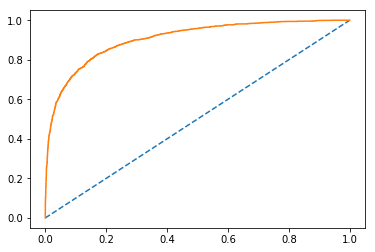

ROC AUC: 0.9055985817692741


In [36]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from matplotlib import pyplot as plt

# predict probabilities
probs = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

roc_auc = auc(fpr,tpr)
print("ROC AUC:", roc_auc)

### ROC AUC value computed is 90.56%

In [37]:
# predict probabilities
probs = lr.predict_proba(test_data)

# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs = pd.DataFrame(probs)
probs

0
0     0.516118
1     0.000547
2     0.041850
3     0.965528
4     0.040253
5     0.156389
6     0.795270
7     0.002767
8     0.998114
9     0.220243
10    0.203233
11    0.819312
12    0.015207
13    0.199585
14    0.029705
15    0.011705
16    0.070135
17    0.010625
18    0.077623
19    0.866195
20    0.104890
21    0.989636
22    0.959895
23    0.219080
24    0.977359
25    0.118328
26    0.948403
27    0.142302
28    0.077964
29    0.076234
...        ...
9970  0.548005
9971  0.012270
9972  0.140723
9973  0.013284
9974  0.999149
9975  0.662710
9976  0.069034
9977  0.477499
9978  0.077767
9979  0.105896
9980  0.096128
9981  0.287829
9982  0.208702
9983  0.145414
9984  0.342350
9985  0.123515
9986  0.937579
9987  0.791996
9988  0.138484
9989  0.294253
9990  0.003343
9991  0.390434
9992  0.005166
9993  0.107065
9994  0.998165
9995  0.042583
9996  0.001536
9997  0.028722
9998  0.502568
9999  0.038170

[10000 rows x 1 columns]

In [40]:
probs.to_csv('Prediction1.csv')

## Decision Tree
### Hyper paramter tuning using GridSearchCV

In [43]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {
    'n_estimators': (120, 300),
    'max_depth': (5, 15),
    'min_samples_split': (5,10),
    'min_samples_leaf': (2,5),
    'max_features': ('log2', 'sqrt')
}

clf = GridSearchCV(rf, parameters, cv=5, verbose=5, n_jobs=10)
clf.fit(X_train_res, y_train_res.ravel())

clf.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed: 10.7min
[Parallel(n_jobs=10)]: Done 160 out of 160 | elapsed: 51.8min finished


{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [45]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 15, min_samples_split = 5, min_samples_leaf = 2, max_features = 'log2', verbose=5)
rf.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 300


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 300


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


building tree 4 of 300


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 3

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=5,
            warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished


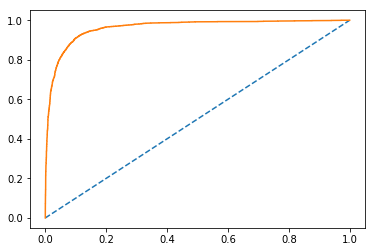

ROC AUC: 0.9618847381410086


In [46]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from matplotlib import pyplot as plt

# predict probabilities
probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

roc_auc = auc(fpr,tpr)
print("ROC AUC:", roc_auc)

### ROC AUC obtained was 96.19%

In [47]:
# predict probabilities
probs = rf.predict_proba(test_data)

# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs = pd.DataFrame(probs)
probs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished


0
0     0.355695
1     0.107135
2     0.292716
3     0.556846
4     0.176038
5     0.338338
6     0.503255
7     0.251795
8     0.726023
9     0.426733
10    0.228551
11    0.351388
12    0.142082
13    0.244173
14    0.139941
15    0.153554
16    0.203715
17    0.419279
18    0.249319
19    0.484666
20    0.278157
21    0.535106
22    0.585700
23    0.519245
24    0.602103
25    0.194483
26    0.738082
27    0.257872
28    0.297183
29    0.301449
...        ...
9970  0.381252
9971  0.221388
9972  0.271056
9973  0.210525
9974  0.693188
9975  0.474501
9976  0.345484
9977  0.286453
9978  0.364035
9979  0.283784
9980  0.230652
9981  0.410461
9982  0.229016
9983  0.192313
9984  0.548582
9985  0.295415
9986  0.617961
9987  0.540268
9988  0.141346
9989  0.294374
9990  0.208024
9991  0.340207
9992  0.224611
9993  0.141809
9994  0.692503
9995  0.399323
9996  0.196609
9997  0.214231
9998  0.275174
9999  0.415562

[10000 rows x 1 columns]

In [48]:
probs.to_csv('Prediction2.csv')